#####IMPORTANDO LAS BIBLIOTECAS

In [1]:
# Imports needed for the script
from os import system
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'pydotplus'

##### CARGANDO LOS DATOS

In [2]:
DataFrame=pd.read_csv('F:\Ingeniería Industrial e Engenharia de  Produção\Cursos de Informática y análisis de sistemas etc/UDACITY/Paso a paso ejemplo de machine learning\machine-learning-master/artists_billboard_fix3.csv')

In [3]:
DataFrame.columns

Index(['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'durationSeg', 'top', 'anioNacimiento'],
      dtype='object')

In [4]:
DataFrame.dtypes

id                  int64
title              object
artist             object
mood               object
tempo              object
genre              object
artist_type        object
chart_date          int64
durationSeg       float64
top                 int64
anioNacimiento    float64
dtype: object

In [5]:
df=pd.DataFrame(DataFrame, index=np.arange(len(DataFrame)))
df

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0


#####ANALISIS EXPLORATORIO DE LOS DATOS

In [6]:
df.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


In [7]:
df.groupby('top').size()

top
0    494
1    141
dtype: int64

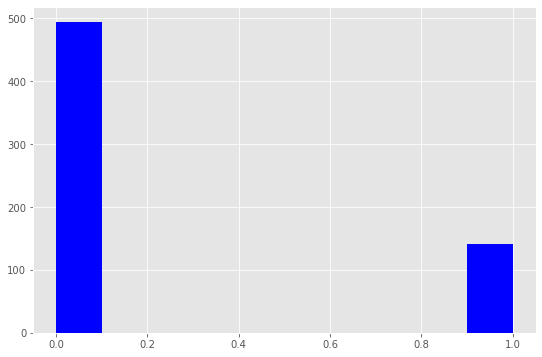

In [8]:
df['top'].hist(figsize=(9,6), color='blue')

#####Nuestras etiquetas que indican 0-No llego al Top y 1-Llego al número uno Billboard están desbalanceadas. Deberemos resolver este inconveniente

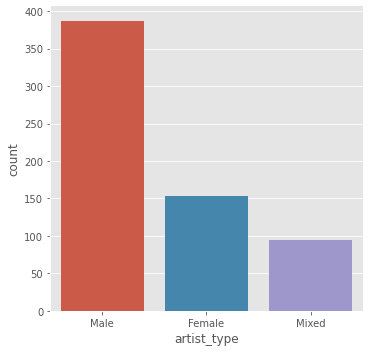

In [9]:
sb.catplot('artist_type',data=df,kind="count")

#####Aqui vemos que tenemos más del doble de artistas masculinos que femeninos y unos 100 registros de canciones mixtas

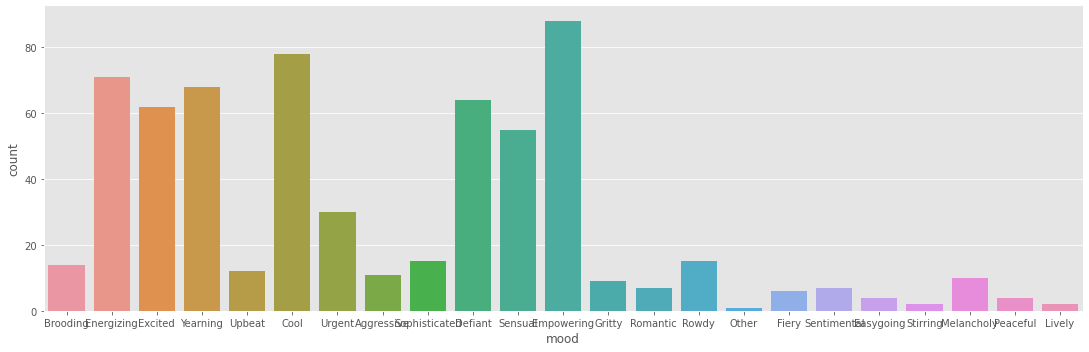

In [10]:
sb.catplot('mood',data=df,kind="count", aspect=3)

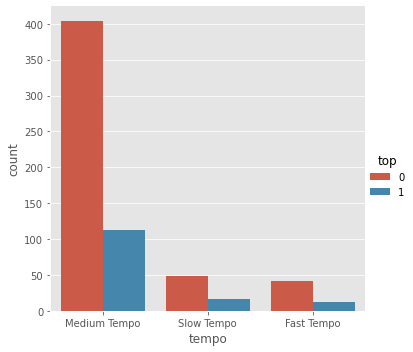

In [11]:
sb.catplot('tempo',data=df,hue='top',kind="count")

#####En esta gráfica vemos que hay 3 tipos de Tempo: Medium, Slow y Fast. Evidentemente predominan los tiempos Medium y también es donde encontramos más canciones que hayan alcanzado el Top 1 (en azul)

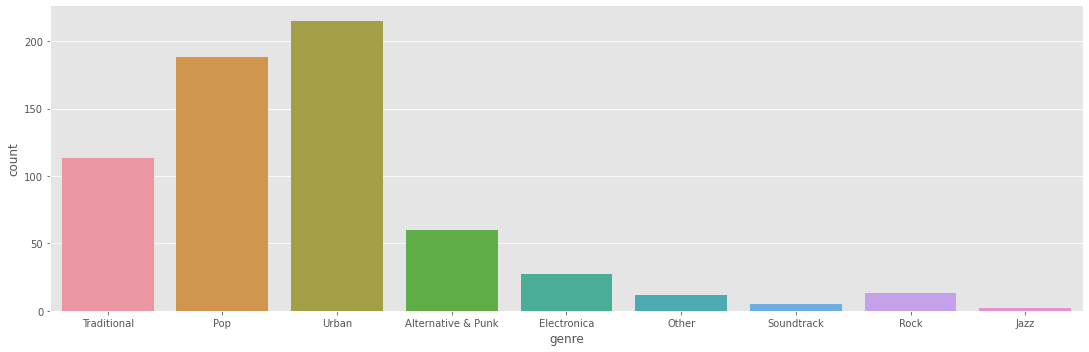

In [12]:
sb.catplot('genre',data=df,kind="count", aspect=3)

#####Entre los géneros musicales destacan Urban y Pop, seguidos de Tradicional.

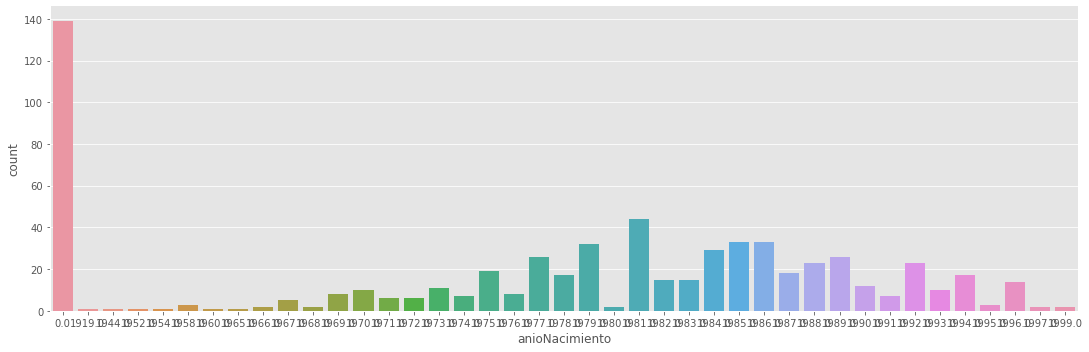

In [17]:
sb.catplot('anioNacimiento',data=df,kind="count", aspect=3, height=5,)
plt.savefig('F:/catplot.jpg')

#####Aqui notamos algo raro: en el año «cero» tenemos cerca de 140 registros…Como se ve en la gráfica tenemos cerca de 140 canciones de las cuales desconocemos el año de nacimiento del artista. El resto de años parecen concentrarse entre 1979 y 1994 (a ojo). Más adelante trataremos estos registros.

ValueError: s must be a scalar, or the same size as x and y

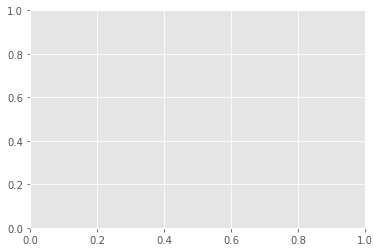

In [19]:
f1 = df['chart_date'].values
f2 = df['durationSeg'].values
 
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=[60,40] # si no estaban declarados previamente
 
asignar=[]
asignar2=[]
for index, row in df.iterrows():    
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])
 
plt.scatter(f1, f2, c=asignar, s=tamanios)
plt.axis([20030101,20160101,0,600])
plt.show()

#####En nuestro conjunto de Datos, se agregaron canciones que llegaron al top (en azul) de años 2004 al 2013 para sumar a los apenas 11 que lo habían logrado en 2014-2015.

In [20]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio
 
df['anioNacimiento']=df.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1)

In [21]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio
df['edad_en_billboard']=df.apply(lambda x:calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1)

In [22]:
age_avg = df['edad_en_billboard'].mean()
age_std = df['edad_en_billboard'].std()
age_null_count = df['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(df['edad_en_billboard'])

df.loc[np.isnan(df['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
df['edad_en_billboard'] = df['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


In [23]:
df.columns

Index(['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'durationSeg', 'top', 'anioNacimiento',
       'edad_en_billboard'],
      dtype='object')

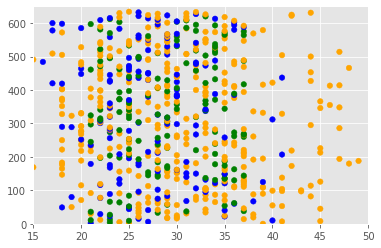

In [24]:
f1 = df['edad_en_billboard'].values
f2 = df.index
 
colores = ['orange','blue','green']
 
asignar=[]
for index, row in df.iterrows():    
    if (conValoresNulos[index]):
        asignar.append(colores[2]) # verde
    else:
        asignar.append(colores[row['top']])
 
plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([15,50,0,650])
plt.show()

#######Mapeo de Datos

Vamos a transformar varios de los datos de entrada en valores categóricos. Las edades, las separamos en: menor de 21 años, entre 21 y 26, etc. las duraciones de canciones también, por ej. entre 150 y 180 segundos, etc. Para los estados de ánimo (mood) agrupé los que eran similares.

El Tempo que puede ser lento, medio o rápido queda mapeado: 0-Rapido, 1-Lento, 2-Medio (por cantidad de canciones en cada tempo: el Medio es el que más tiene)

In [35]:
#Mood Mapping 
df['moodEncoded'] = df['mood'].map( 
{'Energizing': 6, 'Empowering': 6,'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
df['tempoEncoded'] = df['tempo'].map({'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0}).astype(int)
# Genre Mapping 
df['genreEncoded'] = df['genre'].map({'Urban': 4, 'Pop': 3,'Traditional': 2,'Alternative & Punk': 1,'Electronica': 1,'Rock': 1,'Soundtrack': 0, 
                                          'Jazz': 0,'Other':0,'':0}).astype(int)
# artist_type Mapping 
df['artist_typeEncoded'] =df['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed':1, '': 0} ).astype(int)


# Mapping edad en la que llegaron al billboard
df.loc[ df['edad_en_billboard'] <= 21,'edadEncoded']= 0
df.loc[(df['edad_en_billboard'] > 21) & (df['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
df.loc[(df['edad_en_billboard'] > 26) & (df['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
df.loc[(df['edad_en_billboard'] > 30) & (df['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
df.loc[ df['edad_en_billboard'] > 40,'edadEncoded'] = 4

# Mapping Song Duration
df.loc[ df['durationSeg'] <= 150, 'durationEncoded']  = 0
df.loc[(df['durationSeg'] > 150) & (df['durationSeg'] <= 180), 'durationEncoded'] = 1
df.loc[(df['durationSeg'] > 180) & (df['durationSeg'] <= 210), 'durationEncoded'] = 2
df.loc[(df['durationSeg'] > 210) & (df['durationSeg'] <= 240), 'durationEncoded'] = 3
df.loc[(df['durationSeg'] > 240) & (df['durationSeg'] <= 270), 'durationEncoded'] = 4
df.loc[(df['durationSeg'] > 270) & (df['durationSeg'] <= 300), 'durationEncoded'] = 5
df.loc[ df['durationSeg'] > 300, 'durationEncoded'] = 6

In [36]:
df[['moodEncoded', 'tempoEncoded','genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded']]

,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,4,2,2,3,3.0,2.0
1,6,2,3,2,1.0,6.0
2,5,2,4,1,0.0,3.0
3,4,2,1,3,1.0,2.0
4,4,2,2,2,3.0,3.0
5,5,2,2,3,1.0,3.0
6,5,1,4,2,2.0,0.0
7,3,0,3,3,4.0,6.0
8,4,2,4,2,4.0,2.0
9,4,2,1,3,3.0,6.0


In [37]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = df.drop(drop_elements, axis = 1)

In [38]:
artists_encoded[['moodEncoded', 'top']].groupby(['moodEncoded'], as_index=False).\
    agg(['mean', 'count', 'sum'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">top</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>moodEncoded</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.000000</td>
      <td>8</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.274194</td>
      <td>62</td>
      <td>17</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.145631</td>
      <td>103</td>
      <td>15</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.136986</td>
      <td>146</td>
      <td>20</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.294872</td>
      <td>156</td>
      <td>46</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.270440</td>
      <td>159</td>
      <td>43</td>
    </tr>
  </tbody>
</table>
</div>

In [39]:
artists_encoded[['artist_typeEncoded', 'top']].groupby(['artist_typeEncoded'], as_index=False).\
    agg(['mean', 'count', 'sum'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">top</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>artist_typeEncoded</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.305263</td>
      <td>95</td>
      <td>29</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.320261</td>
      <td>153</td>
      <td>49</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.162791</td>
      <td>387</td>
      <td>63</td>
    </tr>
  </tbody>
</table>
</div>

In [40]:
artists_encoded[['tempoEncoded', 'top']].groupby(['tempoEncoded'], as_index=False).\
    agg(['mean', 'count', 'sum'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">top</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>tempoEncoded</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.226415</td>
      <td>53</td>
      <td>12</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.246154</td>
      <td>65</td>
      <td>16</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.218569</td>
      <td>517</td>
      <td>113</td>
    </tr>
  </tbody>
</table>
</div>

In [45]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold] 
        f_valid = artists_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['top'], axis=1), 
                               y = f_train["top"]) 
        valid_acc = model.score(X = f_valid.drop(['top'], axis=1), 
                                y = f_valid["top"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.556101
         2          0.556126
         3          0.564038
         4          0.644196
         5          0.623810
         6          0.631548
         7          0.634673


In [156]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
dot_data=open('F:\Ingeniería Industrial e Engenharia de  Produção\Cursos de Informática y análisis de sistemas etc/UDACITY/Paso a paso ejemplo de machine learning/tree1.dot', 'w') 
dot_data=tree.export_graphviz(decision_tree,max_depth = 7,impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
graph = graph_from_dot_data(dot_data)
graph.write_png('F:\Ingeniería Industrial e Engenharia de  Produção\Cursos de Informática y análisis de sistemas etc/UDACITY/Paso a paso ejemplo de machine learning/tree1.png')

True

In [157]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

64.88


In [158]:
###predecir artista CAMILA CABELLO featuring YOUNG THUG
#####con su canción Havana llego a numero 1 Billboard US en 2017
# con su canción Havana llego a numero 1 Billboard US en 2017
 
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 
                               'genreEncoded','artist_typeEncoded',
                               'edadEncoded','durationEncoded'))
x_test.loc[0] = (1,5,2,4,1,0,3)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: ",str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
print("Probabilidad de Acierto: ",str(y_proba[0]))

Prediccion:  [1]
Probabilidad de Acierto:  [0.13793103 0.86206897]


In [159]:
# con su canción Havana llego a numero 1 Billboard US en 2017
 
x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded'))
x_test.loc[0] = (0,4,2,1,3,2,3)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " ,str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
[y_proba,y_pred]
#prediccion es la prediccion del modelo.
#[y_proba,y_pred] representa la probabilidad de que el resultado 
# sea real respecto la class_names del dot_data

Prediccion:  [0]


[array([[0.88888889, 0.11111111]]), array([0], dtype=int64)]